### required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing


### open file

In [2]:
Breast_cancer_df = pd.read_csv("breast_cancer.csv")
Breast_cancer_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### clear data

In [3]:
print (Breast_cancer_df.info())
Breast_cancer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB
None


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### call columns

In [4]:
Breast_cancer_df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

### defin x &  y 

In [5]:
X = np.asarray(Breast_cancer_df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']])
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

In [6]:
y = np.asarray(Breast_cancer_df['Class'])
y [0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2], dtype=int64)

### changing y array to 0 & 1

In [7]:
y = np.where(y == 4, 1, 0)
y[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### normalizing x

In [8]:
print(X[0:10])
Scaler= preprocessing.StandardScaler().fit(X)
X =Scaler.transform(X.astype(float))
print(X[0:10])

[[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]
 [ 8 10 10  8  7 10  9  7  1]
 [ 1  1  1  1  2 10  3  1  1]
 [ 2  1  2  1  2  1  3  1  1]
 [ 2  1  1  1  2  1  1  1  5]
 [ 4  2  1  1  2  1  2  1  1]]
[[ 0.19790469 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.19790469  0.27725185  0.26278299  0.75803177  1.69516613  1.77286724
  -0.18182716 -0.28510482 -0.34839971]
 [-0.51164337 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.4242175
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.55267873  1.58320366  1.6021918  -0.63936553 -0.10545357  0.12505369
  -0.18182716  1.3540079  -0.34839971]
 [-0.15686934 -0.70221201 -0.74177362  0.05933312 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]
 [ 1.26222679  2.23617957  2.2718962   1.80607975  1.69516613  1.77286724
   2.26925078  1.3540079  -0.34839971]
 [-1.22119144 -0.70221

### Obtaining the data distribution

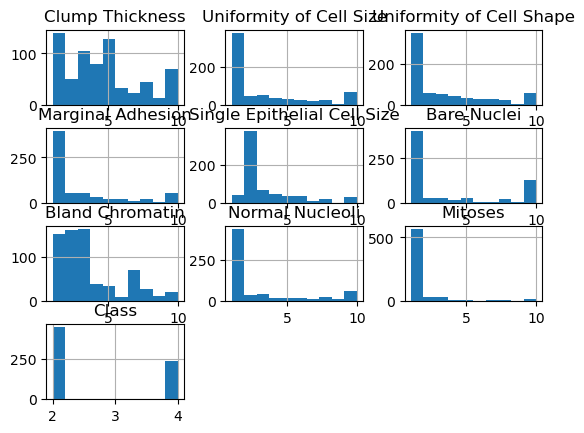

In [9]:
Bcf = Breast_cancer_df[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']]
Bcf.head(3)
viz = Bcf[['Clump Thickness', 'Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses','Class']]
viz.hist()
plt.show()

### The effect of each parameter on the type of tumor

Correlation coefficient:  0.7147899263221612


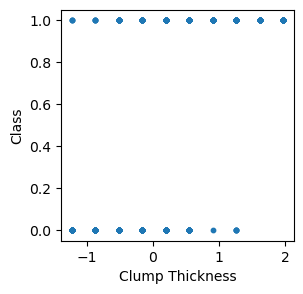

Correlation coefficient:  0.8208014428258776


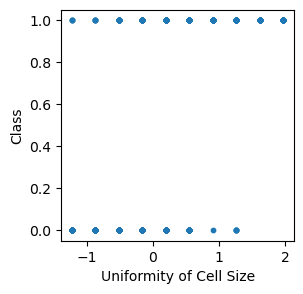

Correlation coefficient:  0.821890947688869


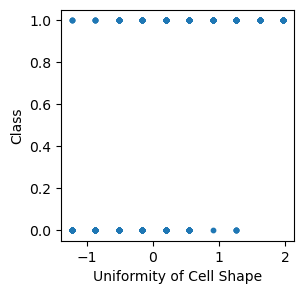

Correlation coefficient:  0.7062941354660857


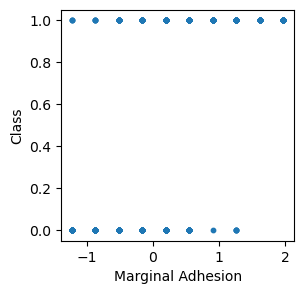

Correlation coefficient:  0.6909581590873196


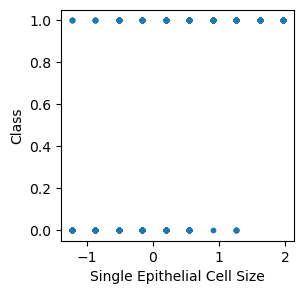

Correlation coefficient:  0.8226958729964602


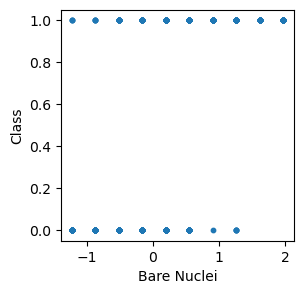

Correlation coefficient:  0.7582275545334297


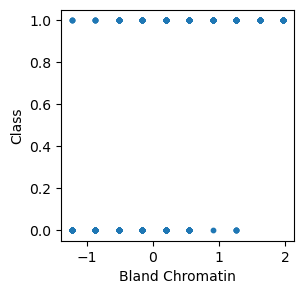

Correlation coefficient:  0.7186771878756363


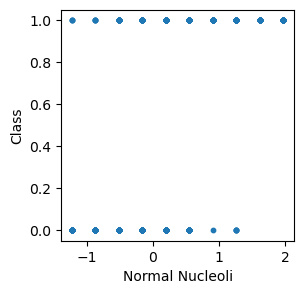

Correlation coefficient:  0.42344792129521286


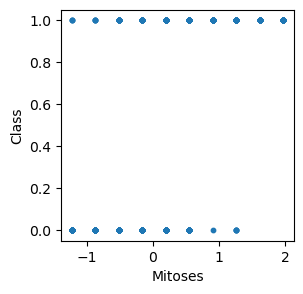

In [10]:
corr_coef = np.corrcoef(X[:, 0], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Clump Thickness")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 1], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Uniformity of Cell Size")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 2], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Uniformity of Cell Shape")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 3], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Marginal Adhesion")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 4], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Single Epithelial Cell Size")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 5], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Bare Nuclei")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 6], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Bland Chromatin")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 7], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Normal Nucleoli")
plt.ylabel("Class")
plt.show()

corr_coef = np.corrcoef(X[:, 8], y)[0, 1]
print("Correlation coefficient: ", corr_coef)
plt.figure(figsize=(3, 3), dpi=100)
plt.scatter(X[:, 0], y, s=10)
plt.xlabel("Mitoses")
plt.ylabel("Class")
plt.show()

### Data separation

In [11]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split( X, y, test_size=0.1, random_state=20)
X_train, X_validation, y_train , y_validation = train_test_split(X_train_valid,y_train_valid, test_size=0.111,random_state=4 )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('validation set:', X_validation.shape, y_validation.shape)


Train set: (545, 9) (545,)
Test set: (69, 9) (69,)
validation set: (69, 9) (69,)


### Training the model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [13]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob[0:5])

[[0.03316452 0.96683548]
 [0.86437544 0.13562456]
 [0.8618102  0.1381898 ]
 [0.78344325 0.21655675]
 [0.91027743 0.08972257]]


### Accuracy calculation

In [15]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, shuffle=True, random_state=20)
model = LogisticRegression()
scores = cross_val_score(model, X, y, cv=kfold)
print('Accuracy:', scores.mean())

Accuracy: 0.9664109121909632


### calculate confusion_matrix

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
                          
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[21  1]
 [ 3 44]]
